In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('babies.csv')

In [5]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [11]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [12]:
df.isna().sum()

,0
case,0
bwt,0
gestation,13
parity,0
age,2
height,22
weight,36
smoke,10


In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

,0
case,0
bwt,0
gestation,0
parity,0
age,0
height,0
weight,0
smoke,0


In [16]:
len(df)

1174

<Axes: xlabel='parity', ylabel='Count'>

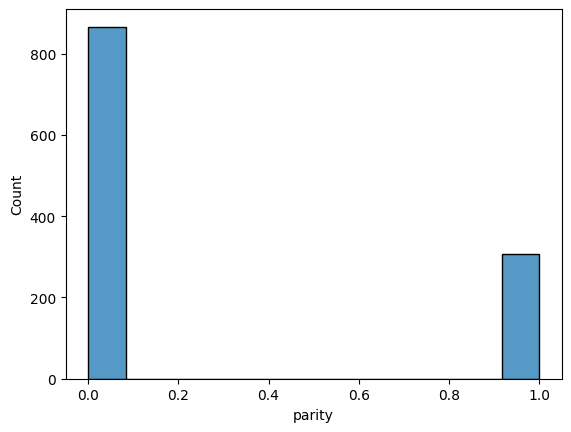

In [18]:
sns.histplot(df['parity'])

In [20]:
print(df.duplicated().sum())

0


In [23]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [24]:
df.drop(columns=['case'],inplace= True)

In [25]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

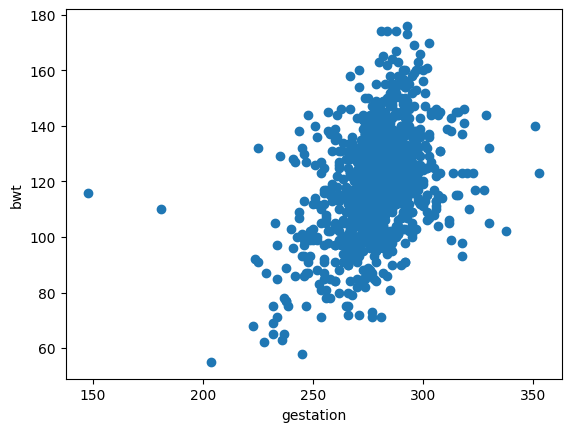

In [26]:
plt.scatter(df['gestation'],df['bwt'])
plt.xlabel('gestation')
plt.ylabel('bwt')
plt.show()

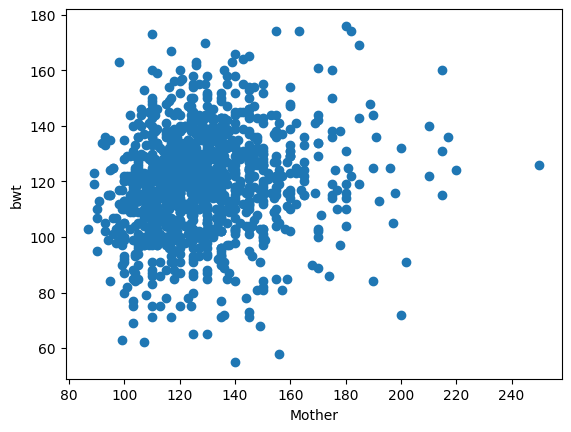

In [28]:
plt.scatter(df['weight'],df['bwt'])
plt.xlabel('Mother')
plt.ylabel('bwt')
plt.show()

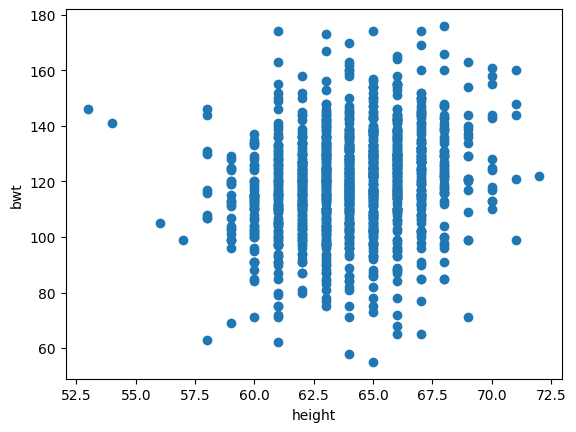

In [29]:
plt.scatter(df['height'],df['bwt'])
plt.xlabel('height')
plt.ylabel('bwt')
plt.show()

In [30]:
df['smoke'].unique()

array([0., 1.])

In [31]:
df['smoke'].value_counts()

,count
smoke,
0.0,715
1.0,459


In [33]:
df['smoke'].value_counts(normalize=True)*100

,proportion
smoke,
0.0,60.902896
1.0,39.097104


In [35]:
df['parity'].value_counts(normalize=True)*100

,proportion
parity,
0,73.764906
1,26.235094


In [36]:
df.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


In [48]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y=df['bwt']

In [42]:
x=df.iloc[:,1:]

In [43]:
x.columns

Index(['gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

In [45]:
x_train,x_test,y_train,y_test=tts(x,y, test_size=0.2)

In [47]:
x_train.shape

(939, 6)

In [49]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

In [50]:
lr.fit(x_train,y_train)
lasso.fit(x_train,y_train)
ridge.fit(x_train,y_train)

Ridge()

In [52]:
lr_pred=lr.predict(x_test)
lasso_pred=lasso.predict(x_test)
ridge_pred=ridge.predict(x_test)

In [54]:
lr_rscore=r2_score(y_test,lr_pred)
llr_rscore=r2_score(y_test,lasso_pred)
rid_rscoure=r2_score(y_test,ridge_pred)

In [55]:
lr_msc=mean_squared_error(y_test,lr_pred)
llr_msc=mean_squared_error(y_test,lasso_pred)
rid_msc=mean_squared_error(y_test,ridge_pred)

In [59]:
print("model evaluation :\n")
print("R2_score", lr_rscore)
print("MSE",lr_msc)
print("model evaluation :\n")
print("R2_score", rid_rscoure)
print("MSE",rid_msc)
print("model evaluation :\n")
print("R2_score", llr_rscore)
print("MSE",llr_msc)

model evaluation :

R2_score 0.13738183073996202
MSE 248.04687378005926
model evaluation :

R2_score 0.1377026015266275
MSE 247.95463576135325
model evaluation :

R2_score 0.1511784580261194
MSE 244.07963730279423
